In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

In [2]:
file = "horizons_results (2).txt"
# i manually did added "|" characters, so i could mark the column split locations
hdr  = ' Date__(UT)__HR:MN    |R.A._____(ICRF)_____DEC |R.A.__(a-apparent)__DEC |Azi____(a-app)___Elev |X_(sat-primary)_Y|SatPANG  | T-mag  |N-mag  |   Illu% | ang-sep/v |ObsSub-LON|ObsSub-LAT  | NP.ang | NP.dist  |             r|       rdot |           delta|     deldot |   S-T-O   |    TDB-UT| Sky_motion |Sky_mot_PA |RelVel-ANG |Lun_Sky_Brt |sky_SNR'
cols = hdr.split('|')
names = cols

widths = np.zeros(len(cols),dtype=int)
for k in range(len(cols)):
    widths[k] = int(len(cols[k]) + 1)
    names[k] = cols[k].strip() # make a clean version of the column names


# this reads all columns correctly, and skips the header, but doesnt skip the footer
df = pd.read_fwf(file, skiprows=71, names = names, widths=widths)

df = df.iloc[0:21601,:] # had to find this row limit manually to drop the footer

In [3]:
df['date'] = pd.to_datetime( df['Date__(UT)__HR:MN'].str[0:17] )
df["deldot"] = df["deldot"].astype(float)
df["acceleration"] = df["deldot"].astype(float).diff() / 60

print(df[["date", "deldot", "acceleration"]].head(20))

                  date     deldot  acceleration
0  2025-07-02 00:00:00 -52.874018           NaN
1  2025-07-02 00:01:00 -52.873959  9.783333e-07
2  2025-07-02 00:02:00 -52.873894  1.076667e-06
3  2025-07-02 00:03:00 -52.873824  1.175000e-06
4  2025-07-02 00:04:00 -52.873747  1.275000e-06
5  2025-07-02 00:05:00 -52.873665  1.373333e-06
6  2025-07-02 00:06:00 -52.873577  1.473333e-06
7  2025-07-02 00:07:00 -52.873482  1.571667e-06
8  2025-07-02 00:08:00 -52.873382  1.673333e-06
9  2025-07-02 00:09:00 -52.873276  1.771667e-06
10 2025-07-02 00:10:00 -52.873163  1.873333e-06
11 2025-07-02 00:11:00 -52.873045  1.973333e-06
12 2025-07-02 00:12:00 -52.872920  2.073333e-06
13 2025-07-02 00:13:00 -52.872790  2.173333e-06
14 2025-07-02 00:14:00 -52.872653  2.275000e-06
15 2025-07-02 00:15:00 -52.872511  2.375000e-06
16 2025-07-02 00:16:00 -52.872362  2.476667e-06
17 2025-07-02 00:17:00 -52.872208  2.578333e-06
18 2025-07-02 00:18:00 -52.872047  2.678333e-06
19 2025-07-02 00:19:00 -52.871880  2.781

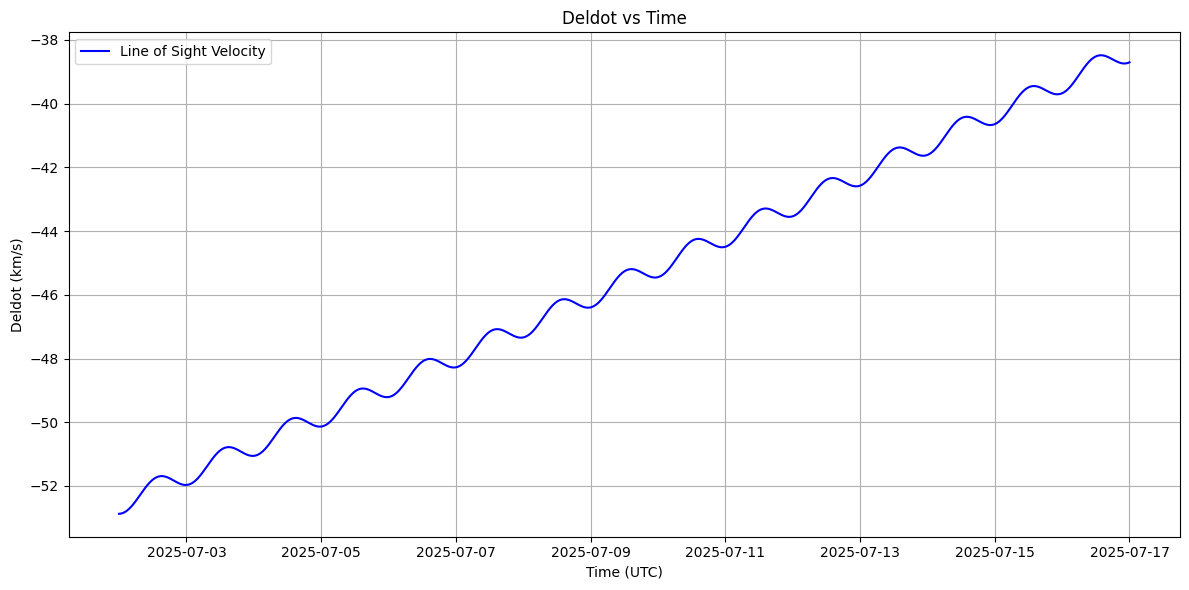

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df['deldot'].astype(float), color='blue', label="Line of Sight Velocity")
plt.xlabel("Time (UTC)")
plt.ylabel("Deldot (km/s)")
plt.title("Deldot vs Time")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
observation_time = [
    ("2025-07-03-05:10:38", 78),
    ("2025-07-05-04:50:14", 66),
    ("2025-07-08-04:52:40", 204),
    ("2025-07-09-05:20:16", 90),
    ("2025-07-10-05:16:28", 18),
]

Date: 2025-07-03 05:10:38; AVG Acceleration: 3.2808247863248184e-05 km/s²; STD Acceleration: 9.85914540809184e-07 km/s²
Date: 2025-07-05 04:50:14; AVG Acceleration: 3.235570707070621e-05 km/s²; STD Acceleration: 9.467378115454759e-07 km/s²
Date: 2025-07-08 04:52:40; AVG Acceleration: 3.44853186274513e-05 km/s²; STD Acceleration: 8.945620206935841e-07 km/s²
Date: 2025-07-09 05:20:16; AVG Acceleration: 3.48605555555563e-05 km/s²; STD Acceleration: 5.350421477561101e-07 km/s²
Date: 2025-07-10 05:16:28; AVG Acceleration: 3.4134814814813625e-05 km/s²; STD Acceleration: 1.8761566269669944e-07 km/s²


/var/folders/z0/kkt653vs1rscq9_7hh77yyyr0000gn/T/ipykernel_25100/1225449487.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


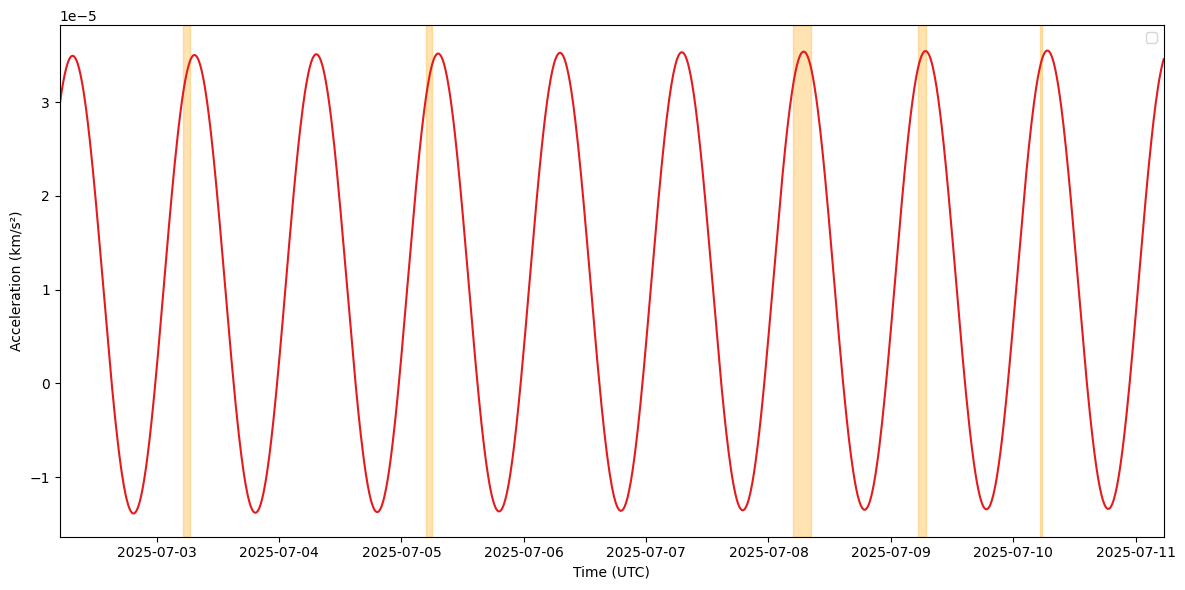

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df["date"], df["acceleration"], color='#e41a1c')

for start_time, duration in observation_time:
    start = pd.to_datetime(start_time, format="%Y-%m-%d-%H:%M:%S")
    end = start + timedelta(minutes=duration)
    plt.axvspan(start, end, color='orange', alpha=0.3)

    #Getting the average and standard deviation of acceleration in this time chunk
    data_in_chunk = df[(df["date"] >= start) & (df["date"] < end)]["acceleration"].dropna()
    if not data_in_chunk.empty:
        avg_acceleration = data_in_chunk.mean()
        std_acceleration = data_in_chunk.std()
        print(f"Date: {start}; AVG Acceleration: {avg_acceleration} km/s²; STD Acceleration: {std_acceleration} km/s²")


plt.xlabel("Time (UTC)")
plt.ylabel("Acceleration (km/s²)")
plt.xlim(left=pd.to_datetime("2025-07-02-05:00:00"), right=pd.to_datetime("2025-07-11-05:30:00"))
#plt.title("Acceleration vs Time")
plt.legend()
plt.tight_layout()
plt.show()
